In [3]:
import pandas as pd
dataset = pd.read_csv("Mall_Customers.csv")

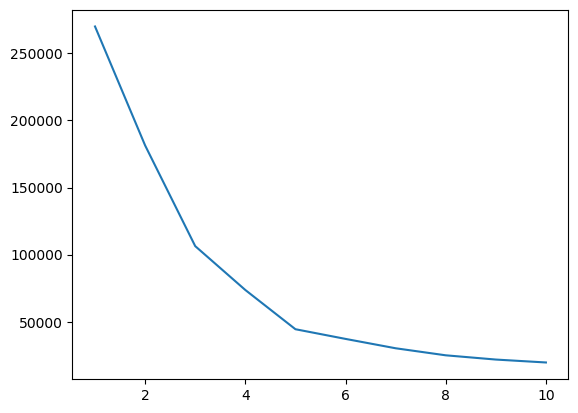

In [14]:
#clustering will be the output.. So NO y(output)
#Plot using the model inertia to find the cluster value between 1 to 10
X= dataset.iloc[:, [3,4]].values # just taking AnnualIncome and Spending score input.. the rest are not related

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
list1 = []
param_grid_Kmean = {
    'n_clusters': [2, 3, 4, 5, 6],  # Number of clusters to test
    'init': ['k-means++', 'random']#,  # Initialization methods
  #  'n_init': [10, 20],  # Number of times the algorithm is run with different initial centroids
   # 'max_iter': [300, 500]  # Maximum number of iterations
}
for i in range(1,11):
  #  kmeans_grid = GridSearchCV(KMeans(), param_grid_Kmean, random_state=42)
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), list1)
plt.show()

In [17]:
#from the above, find the edge which more towards the higher of X value
#build the model for the above found cluster = 5
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)  # find the category for each of the output


    

In [23]:
#add the category to a new field in the dataset
supervised = pd.DataFrame(dataset)
supervised['Cluster_group'] = y_kmeans
supervised.to_csv("cluster.csv", index= False)

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


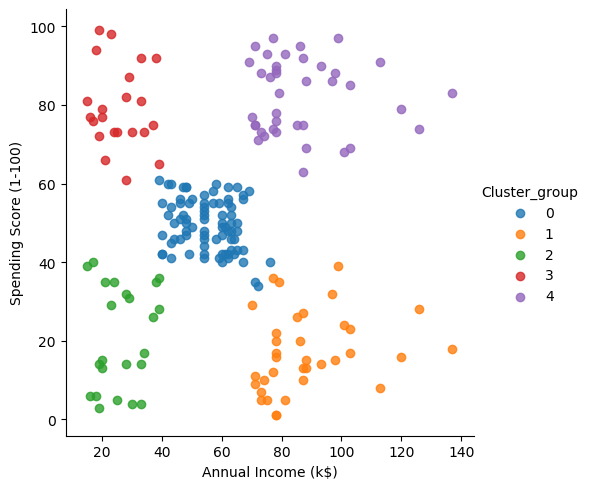

In [27]:
#plot the dataset to see its each value's cluster
import seaborn as sns
facet = sns.lmplot(data= supervised, x= supervised.columns[3], y = supervised.columns[4], hue= supervised.columns[5] ,
                  fit_reg=False, legend= True, legend_out= True)

In [26]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1
